In [21]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from scipy.stats import shapiro,normaltest,kstest
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix,confusion_matrix,classification_report

# PROBLEM STATEMENT

In [2]:
# Credit Card Fraud Prediction

# DATA GATHERING

In [3]:
df=pd.DataFrame(pd.read_csv(r"C:\Users\Rutuja Salunke\Downloads\Credit Card 1\creditcard.csv"))

In [4]:
df1=df.head(10000)
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15001.0,1.178755,0.596025,0.074131,2.542393,0.450685,-0.179355,0.326365,-0.234949,0.473040,...,-0.228112,-0.561559,-0.182781,-0.523241,0.667142,0.015699,-0.067238,0.008709,53.19,0
9996,15004.0,1.228455,0.049488,1.022099,0.386471,-0.973228,-1.067822,-0.383162,-0.205407,1.699304,...,-0.322912,-0.730294,0.205601,0.686302,-0.071008,0.729846,-0.092276,0.012277,12.18,0
9997,15008.0,-0.971734,0.744625,2.334822,-0.408046,-0.999231,-0.629294,-0.377212,0.481230,1.599496,...,-0.116821,-0.141219,-0.026115,0.712719,-0.372964,0.750323,-0.107875,0.031272,4.05,0
9998,15010.0,-1.529666,1.475870,1.507624,-0.662935,-1.037152,-1.159860,-0.303219,0.745766,0.946896,...,-0.197993,-0.634088,0.100631,0.669449,-0.269750,0.611964,-0.169789,0.007846,4.05,0


# EDA

In [5]:
df1.shape

(10000, 31)

In [6]:
df1.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [9]:
df1.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# FEATURE ENGINEERING

### Checking outliers

<Axes: >

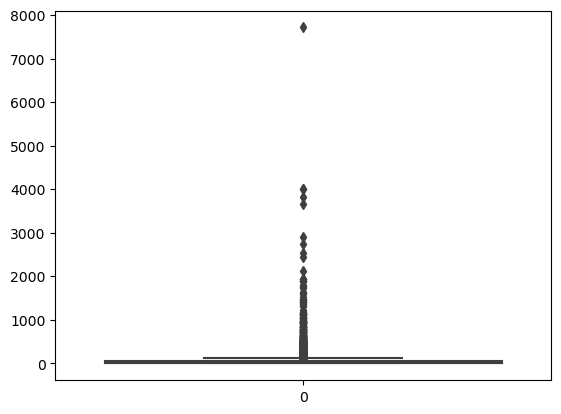

In [10]:
sns.boxplot(df1["Amount"])

In [11]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: >

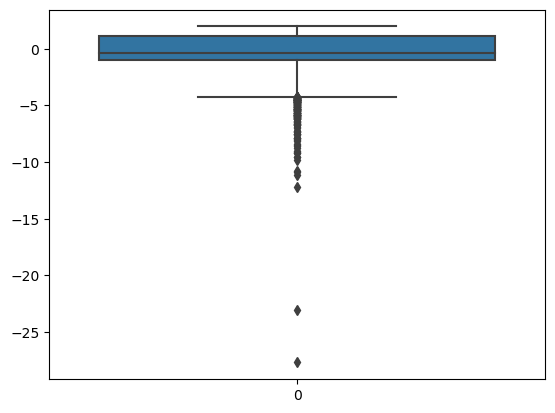

In [12]:
sns.boxplot(df1["V1"])

<Axes: >

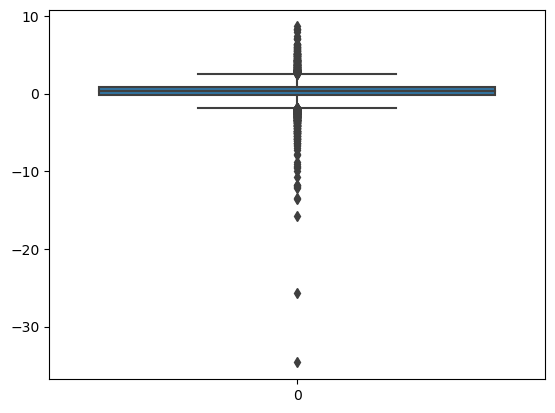

In [13]:
sns.boxplot(df1["V2"])

<Axes: xlabel='Class', ylabel='count'>

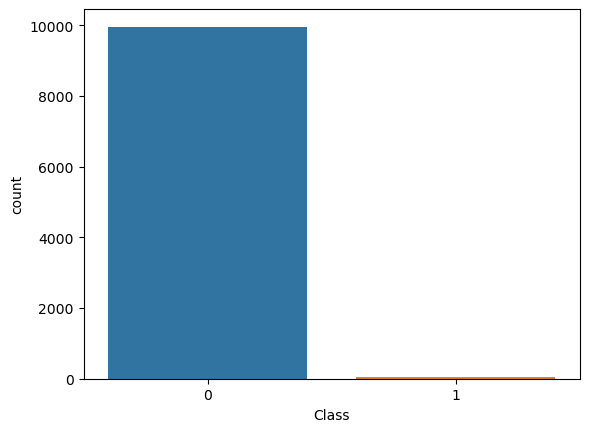

In [14]:
sns.countplot(x=df1["Class"])

In [15]:
df1["Class"].nunique()

2

### Handling outliers

In [16]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
## Handle outliers
def find_iqr(df1,n):
    q1=df1[n].quantile(0.25)
    q3=df[n].quantile(0.75)
    iqr=q3-q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    print(lower_tail)
    print(upper_tail)
    df1[n]=df1[n].apply(lambda x: upper_tail if x>upper_tail else(lower_tail if x<lower_tail else x))
n="Amount"
find_iqr(df1,n)
import warnings
warnings.filterwarnings("ignore")

-103.24749999999999
185.41249999999997


In [24]:
n="Time"
find_iqr(df1,n)

-203798.875
345192.125


In [25]:
n="V1"
find_iqr(df1,n)
import warnings
warnings.filterwarnings("ignore")

-4.5066709135377785
4.809029258327251


In [26]:
n="V2"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-1.7264414602931695
2.321823070160053


In [27]:
n="V3"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-0.5087963551972412
1.9487906810632327


In [28]:
n="V4"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-2.6510717206162377
2.7799890955194826


In [29]:
n="V5"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-2.526364729047674
2.494901141004913


In [30]:
n="V6"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-2.17268345165956
1.9413139051655042


In [31]:
n="V7"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-2.2114936671719927
2.2395939169073533


In [32]:
n="V8"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-0.9678874728539729
1.1044858627899021


In [33]:
n="V9"
find_iqr(df1,n)
warnings.filterwarnings("ignore")

-0.7185387593322322
1.386545704050969


# FEATURE SELECTION

In [34]:
df1.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.053435,-0.020158,0.103873,0.124505,-0.055321,-0.006233,-0.152201,-0.040963,0.550720,...,-0.023008,0.010920,0.014915,-0.017272,-0.019342,0.316069,-0.070044,-0.000049,-0.032499,0.042762
V1,0.053435,1.000000,-0.342180,-0.267315,0.099625,-0.163891,0.005679,-0.198610,0.010603,0.051179,...,-0.132771,-0.050158,-0.109506,-0.004390,0.269609,0.059381,-0.039551,0.055755,-0.086094,-0.068579
V2,-0.020158,-0.342180,1.000000,0.051455,0.151948,0.164637,-0.082632,0.321444,-0.072525,-0.129880,...,0.097248,-0.119731,0.020835,-0.018902,-0.220022,-0.107489,0.058890,-0.022629,-0.492151,0.122040
V3,0.103873,-0.267315,0.051455,1.000000,0.158273,-0.139653,-0.095536,0.158696,-0.144836,0.088939,...,-0.028464,0.301143,-0.027016,0.011952,-0.312630,0.078456,-0.059404,-0.078802,-0.054268,-0.111954
V4,0.124505,0.099625,0.151948,0.158273,1.000000,-0.115962,0.097742,-0.064633,0.026059,-0.073296,...,-0.016927,-0.000829,0.021799,-0.051207,-0.024458,0.021795,-0.035213,0.024428,0.032696,0.116080
V5,-0.055321,-0.163891,0.164637,-0.139653,-0.115962,1.000000,0.237245,0.160700,0.114191,-0.091995,...,-0.061585,-0.117000,-0.016380,0.002970,-0.015481,-0.171187,-0.013896,-0.105121,-0.301124,-0.054744
V6,-0.006233,0.005679,-0.082632,-0.095536,0.097742,0.237245,1.000000,-0.233848,0.365437,0.012382,...,0.085926,-0.025500,-0.031595,-0.133686,0.059661,-0.030274,-0.061126,-0.050488,0.185713,-0.117732
V7,-0.152201,-0.198610,0.321444,0.158696,-0.064633,0.160700,-0.233848,1.000000,-0.360544,-0.125146,...,-0.176837,0.077794,-0.027520,-0.006265,-0.167522,-0.149172,-0.088327,-0.147008,0.061659,-0.126395
V8,-0.040963,0.010603,-0.072525,-0.144836,0.026059,0.114191,0.365437,-0.360544,1.000000,-0.096992,...,-0.121946,0.068464,0.067414,0.008126,0.003473,0.018213,0.152641,0.164692,-0.010784,0.075123
V9,0.550720,0.051179,-0.129880,0.088939,-0.073296,-0.091995,0.012382,-0.125146,-0.096992,1.000000,...,0.004015,0.022226,-0.005410,-0.005717,0.085503,0.218390,-0.049858,-0.063819,-0.013036,-0.100968


<Axes: xlabel='Class', ylabel='count'>

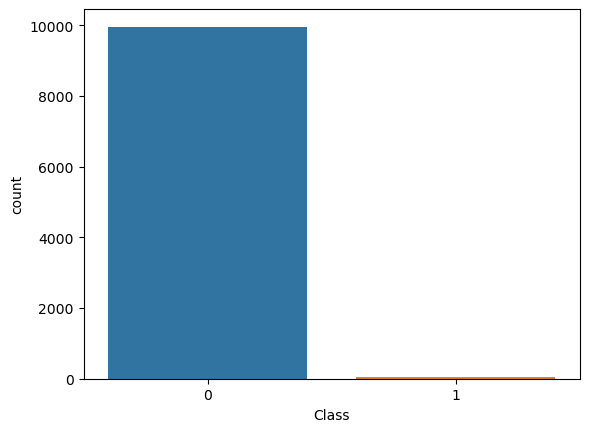

In [35]:
sns.countplot(x=df1["Class"])

In [36]:
df2=df1.drop("Class",axis=1)

In [37]:
x=df2
y=df1["Class"]

In [38]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10,stratify=y)

In [39]:
log_reg=LogisticRegression()
log_reg

LogisticRegression()

In [40]:
log_reg_model=log_reg.fit(xtrain,ytrain)
log_reg_model
warnings.filterwarnings("ignore")

In [41]:
ytrain_pred=log_reg_model.predict(xtrain)

In [42]:
accuracy = accuracy_score(ytrain,ytrain_pred)
print(f"Accuracy : {accuracy}")
print("*"*55)

class_report = classification_report(ytrain,ytrain_pred)
print(class_report)
print("*"*55)

Accuracy : 0.99975
*******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       0.97      0.97      0.97        30

    accuracy                           1.00      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       1.00      1.00      1.00      8000

*******************************************************


In [43]:
#Testing
y_pred_test = log_reg_model.predict(xtest)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
accuracy = accuracy_score(ytest,y_pred_test)
print(f"Accuracy : {accuracy}")
print("*"*55)

print(classification_report(ytest,y_pred_test))
print("*"*55)

Accuracy : 0.999
*******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       0.88      0.88      0.88         8

    accuracy                           1.00      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       1.00      1.00      1.00      2000

*******************************************************


# DECISION TREE

In [45]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [46]:
dt_model=dt.fit(xtrain,ytrain)
dt_model

DecisionTreeClassifier()

In [47]:
ytrain_pred1=dt_model.predict(xtrain)

In [48]:
accuracy = accuracy_score(ytrain,ytrain_pred1)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,ytrain_pred1)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       1.00      1.00      1.00        30

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000




In [49]:
#Testing
y_pred_test1 = dt_model.predict(xtest)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
accuracy = accuracy_score(ytest,y_pred_test1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_pred_test1))
print()

Accuracy : 0.9985

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       0.78      0.88      0.82         8

    accuracy                           1.00      2000
   macro avg       0.89      0.94      0.91      2000
weighted avg       1.00      1.00      1.00      2000




In [51]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
} 

In [45]:
grid_search_model  = GridSearchCV(dt_model,hyperparameters,cv=5)
grid_search_model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [46]:
grid_search_model.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [47]:
grid_search_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2)

In [48]:
hyp_dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2)

In [49]:
hyp_dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=2)

In [50]:
yt_predict=hyp_dt_model.predict(xtrain)
yt_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
accuracy = accuracy_score(ytrain,yt_predict)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,yt_predict)
print(class_report)
print()

Accuracy : 0.99975

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       1.00      0.93      0.97        30

    accuracy                           1.00      8000
   macro avg       1.00      0.97      0.98      8000
weighted avg       1.00      1.00      1.00      8000




In [52]:
ytest_predict1 = hyp_dt_model.predict(xtest)

In [53]:
accuracy = accuracy_score(ytest,ytest_predict1)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,ytest_predict1))
print()

Accuracy : 0.9995

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      0.88      0.93         8

    accuracy                           1.00      2000
   macro avg       1.00      0.94      0.97      2000
weighted avg       1.00      1.00      1.00      2000




# RANDOM FOREEST

In [52]:
Random_model=RandomForestClassifier()
Random_model

RandomForestClassifier()

In [53]:
Random_model_reg=Random_model.fit(xtrain,ytrain)
Random_model_reg

RandomForestClassifier()

In [54]:
y_pred=Random_model_reg.predict(xtrain)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
accuracy = accuracy_score(ytrain,y_pred)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred)
print(class_report)
print()

Accuracy : 1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       1.00      1.00      1.00        30

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000




In [56]:
y_test_predict = Random_model_reg.predict(xtest)

In [57]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.9995

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      0.88      0.93         8

    accuracy                           1.00      2000
   macro avg       1.00      0.94      0.97      2000
weighted avg       1.00      1.00      1.00      2000




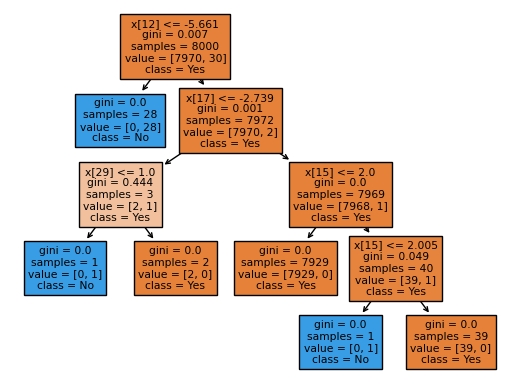

In [58]:
dt_plot = plot_tree(dt_model,class_names=["Yes","No"],filled=True)


In [59]:
hyperparameters=hyperparameters = {
    "criterion" : ["entropy","gini"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,20),
    "min_samples_leaf" : np.arange(2,10),
    "n_estimators":np.array([1,100]),
    "max_features":["auto"]

} 

In [60]:
rf=RandomizedSearchCV(Random_model_reg,hyperparameters,cv=5)
rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'max_features': ['auto'],
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19]),
                                        'n_estimators': array([  1, 100])})

In [61]:
rf_model=rf.fit(xtrain,ytrain)
rf_model
warnings.filterwarnings("ignore")

In [64]:
rf_model.best_estimator_

RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=1)

In [63]:
hyper_rf_model=RandomForestClassifier(max_depth=9, max_features='auto', min_samples_leaf=7,
                       min_samples_split=6, n_estimators=1)

In [64]:
hyper_rf_model.fit(xtrain,ytrain)
warnings.filterwarnings("ignore")

In [67]:
y_pred1=hyper_rf_model.predict(xtrain)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
accuracy = accuracy_score(ytrain,y_pred1)
print(f"Accuracy : {accuracy}")
print()

class_report = classification_report(ytrain,y_pred1)
print(class_report)
print()

Accuracy : 0.998625

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7970
           1       1.00      0.63      0.78        30

    accuracy                           1.00      8000
   macro avg       1.00      0.82      0.89      8000
weighted avg       1.00      1.00      1.00      8000




In [69]:
y_test_predict1 = hyper_rf_model.predict(xtest)

In [70]:
accuracy = accuracy_score(ytest,y_test_predict)
print(f"Accuracy : {accuracy}")
print()

print(classification_report(ytest,y_test_predict))
print()

Accuracy : 0.9995

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1992
           1       1.00      0.88      0.93         8

    accuracy                           1.00      2000
   macro avg       1.00      0.94      0.97      2000
weighted avg       1.00      1.00      1.00      2000


